# Diodi

Faremo con quattro differenti diodi l'analisi della caratteristica. 

Diodi Usati:

- Led Rosso
- Led Verde
- Diodo Piccolo
- Diodo 4002

Resistenza Usata : 10k Ohm

## Teoria

Il tutto si basa sulla misura della caratteristica del Diodo, da confrontare successicamente con i dati provenienti dalle simulazioni.
Dal modello analizzato si prevede un comportamento che segue la seguente legge:

$$
I(V)=I_s*\exp\left(\frac{V}{V_t}-c\right)
$$

In [12]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
#%matplotlib inline

plt.style.use('seaborn')

def func(x,I_s,V_t,c):
    return I_s*(np.exp(x/V_t)-c)

def plot_diode(xseries, yseries, init_param,xlabel ,ylabel,title , plot_name):
    fig, axs = plt.subplots()
    axs.plot(xseries,yseries,label='Measured',marker ='*', ls = 'none')
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_title(title)
    fit_param, __ = curve_fit(func, xseries, yseries, init_param)
    x_try = np.linspace(min(xseries), max(xseries), 200)
    axs.plot(x_try, func(x_try, *fit_param),label = 'fitted', ls='--')
    axs.legend()
    axs.axis('tight')
    fig.savefig(plot_name+'.svg',format='svg')


## Test Funzioni Varie

Siccome i dati pervenuti nel excel sottostante sono particolarmente scarsi, si è ritenuto opportuno usarli per fare test con funzioni di cui non si conosce esattamente l'efficacia.

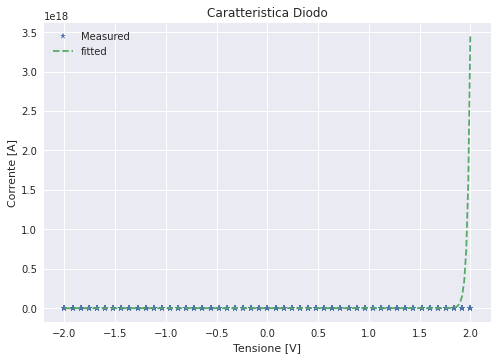

In [13]:
df=pd.read_excel('data/caratteristica diodo.xlsx', sheet_name='Foglio4')
ch1, ch2 = 'CH1 [ V ]','CH2 [ V ]'

series = (df[ch1], df[ch2])

diode_dict = {
    'xlabel': 'Tensione [V]',
    'ylabel': 'Corrente [A]',
    'title' : 'Caratteristica Diodo',
    'plot_name' : 'graphs/LedRosso'
}



#plt.scatter(df[ch1],df[ch2])
#plt.xlabel('Tensione [V]')
# plt.ylabel('Corrente [A]')
init_param= [min(df[ch2]),26e-3,1. ]
# fit_param, pcov = curve_fit(func, df[ch1], df[ch2],init_param)
# print(fit_param)
# x_try=np.linspace(-2.,2., 200 )
#plt.plot(x_try,func(x_try,*fit_param ), 'tab:orange' )
## Test Funzione ad hoc
plot_diode(*series, init_param, **diode_dict)
# plt.plot(x_try, .4*np.exp(x_try/26e-3)-1, 'tab:green')


# Test con nuove misure più precise

In [14]:
def chi_square(f : callable, param : tuple, x_data : np.array, y_data : np.array ) -> float:
    chi = np.sum((y_data-f(x_data, *param))**2)
    return chi/(y_data.size-2)


### Led Rosso

[1.17693217e-12 9.50541919e-02 1.66720369e+00]


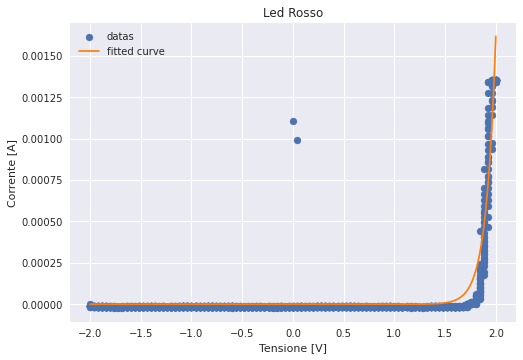

In [15]:
df=pd.read_excel('data/caratteristica diodo_new.xlsx', sheet_name='led rosso')
ch1, ch2 = 'CH1 [ V ]','CH2 [ V ]'
R = 10e3 # Ohm

plt.scatter(df[ch1],df[ch2]/R, label='datas')
plt.xlabel('Tensione [V]')
plt.ylabel('Corrente [A]')

# Fitting della curva
init_param= np.array([min(df[ch2])/R,26e-3,1. ])
fit_param, pcov = curve_fit(func, df[ch1], df[ch2]/R)
print(fit_param)
x_try=np.linspace(-2.,2., 200 )
plt.plot(x_try,func(x_try,*fit_param ), 'tab:orange' , label='fitted curve')
plt.title('Led Rosso')
plt.legend()

#Salvataggio immagini
plt.savefig('led_rosso.pdf',format='pdf')

### Led Verde

[4.47287532e-11 1.17563616e-01 1.70667126e+00]


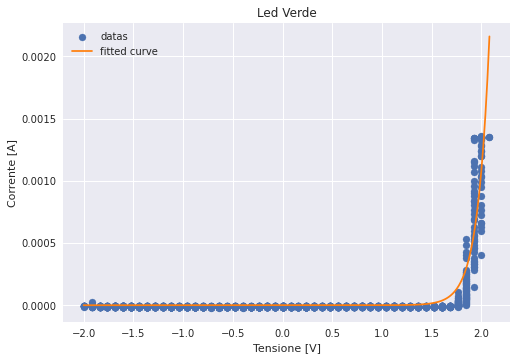

In [16]:

df=pd.read_excel('data/caratteristica diodo_new.xlsx', sheet_name='led verde')
ch1, ch2 = 'CH1 [ V ]','CH2 [ V ]'

plt.scatter(df[ch1],df[ch2]/R,label='datas')
plt.xlabel('Tensione [V]')
plt.ylabel('Corrente [A]')

# Fitting della curva
init_param= np.array([min(df[ch2])/R,26e-3,1. ])
fit_param, pcov = curve_fit(func, df[ch1], df[ch2]/R)
print(fit_param)
x_try=np.linspace(-2.,max(df[ch1]), 200 )
plt.plot(x_try,func(x_try,*fit_param ), 'tab:orange' ,label = 'fitted curve')
plt.title('Led Verde')
plt.legend()
#Salvataggio immagini
plt.savefig('led_verde.pdf',format='pdf')

### Diodo Piccolo

[2.45481984e-13 3.42789877e-02 8.50184064e-01]


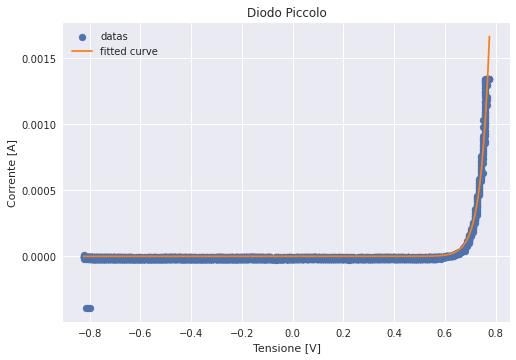

In [17]:

df=pd.read_excel('data/caratteristica diodo_new.xlsx', sheet_name='diodo piccolo')
ch1, ch2 = 'CH1 [ V ]','CH2 [ V ]'

plt.scatter(df[ch1],df[ch2]/R, label = 'datas')
plt.xlabel('Tensione [V]')
plt.ylabel('Corrente [A]')

# Fitting della curva
init_param= np.array([min(df[ch2])/R,26e-3,1. ])
fit_param, pcov = curve_fit(func, df[ch1], df[ch2]/R)
print(fit_param)
x_try=np.linspace(min(df[ch1]),max(df[ch1]), 200 )
plt.plot(x_try,func(x_try,*fit_param ), 'tab:orange', label =  'fitted curve')
plt.title('Diodo Piccolo')
plt.legend()
#Salvataggio immagini
plt.savefig('diodo_piccolo.pdf',format='pdf')


### Diodo Grosso

[6.64856208e-09 5.02513840e-02 2.29198413e+03]
Dev STD : 6.190663524807975, numero dati : 2500


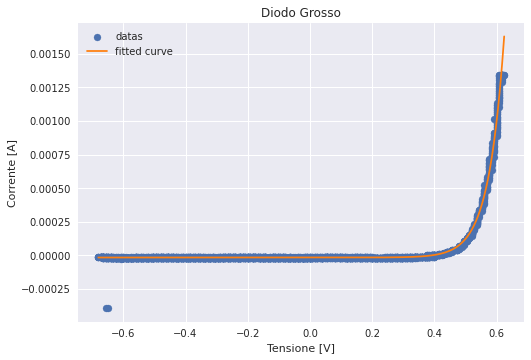

In [18]:

df=pd.read_excel('data/caratteristica diodo_new.xlsx', sheet_name='diodo grosso')
ch1, ch2 = 'CH1 [ V ]','CH2 [ V ]'

plt.scatter(df[ch1],df[ch2]/R, label = 'datas')
plt.xlabel('Tensione [V]')
plt.ylabel('Corrente [A]')

# Fitting della curva
init_param= np.array([min(df[ch2])/R,26e-3,1. ])
fit_param, pcov = curve_fit(func, df[ch1], df[ch2]/R)
print(fit_param)
x_try=np.linspace(min(df[ch1]),max(df[ch1]), 200 )
plt.plot(x_try,func(x_try,*fit_param ), 'tab:orange', label = 'fitted curve' )
print(f'Dev STD : {chi_square(func, fit_param, df[ch1], df[ch2])}, numero dati : {df[ch1].size}')
plt.title('Diodo Grosso')
plt.legend()
#Salvataggio immagini
plt.savefig('diodo_grosso.pdf',format='pdf')



# Misure Rettificatore

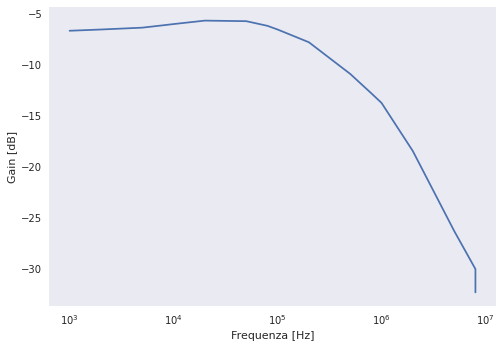

In [19]:
df = pd.read_csv('data/misura_rettificatore.csv')


plt.plot(df['freq'],20*np.log10(df['v_media']/df['v_peak']))
plt.xscale('log')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()

# Elevatore di Tensione


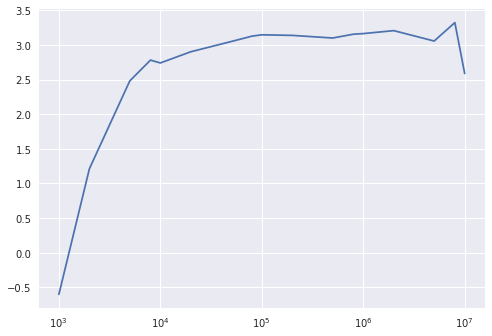

In [20]:
df = pd.read_csv('data/cockcroft.csv')

plt.plot(df['freq'], 20*np.log10(df['v_out']/df['v_in']))
plt.xscale('log')
